In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

c:\Users\aditya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.4)
  from scipy.stats import gaussian_kde


In [5]:
raw_df = pd.read_csv('Data3.csv')
raw_df

,year,month,day,hour,weekend,holiday,temp,precipitation,wind_speed,preasure,electricity_consumed
0,2017,1,1,0,1,0,15.85,3.3,5.70,1016.7,1775.69
1,2017,1,1,1,1,0,15.85,0.8,5.70,1016.7,1565.98
2,2017,1,1,2,1,0,15.85,2.8,5.70,1016.7,1458.04
3,2017,1,1,3,1,0,15.85,0.5,5.70,1016.7,1413.88
4,2017,1,1,4,1,0,15.85,0.8,5.70,1016.7,1441.43
...,...,...,...,...,...,...,...,...,...,...,...
63979,2024,4,19,19,0,0,31.75,0.0,7.85,1004.1,3413.68
63980,2024,4,19,20,0,0,31.75,0.0,7.85,1004.1,3163.21
63981,2024,4,19,21,0,0,31.75,0.0,7.85,1004.1,2909.03
63982,2024,4,19,22,0,0,31.75,0.0,7.85,1004.1,2686.85


In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

inp_cols = ['month', 'hour', 'temp', 'wind_speed', 'preasure']
target_col = 'electricity_consumed'

train_inputs = train_df[inp_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[inp_cols].copy()
test_targets = test_df[target_col].copy()


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[inp_cols])

In [8]:
train_inputs[inp_cols] = scaler.transform(train_inputs[inp_cols])
test_inputs[inp_cols] = scaler.transform(test_inputs[inp_cols])

train_inputs.describe().loc[['min', 'max']]

,month,hour,temp,wind_speed,preasure
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

%matplotlib inline


Mean Squared Error: 93708.98637213408
R^2 Score: 0.9336256866859279


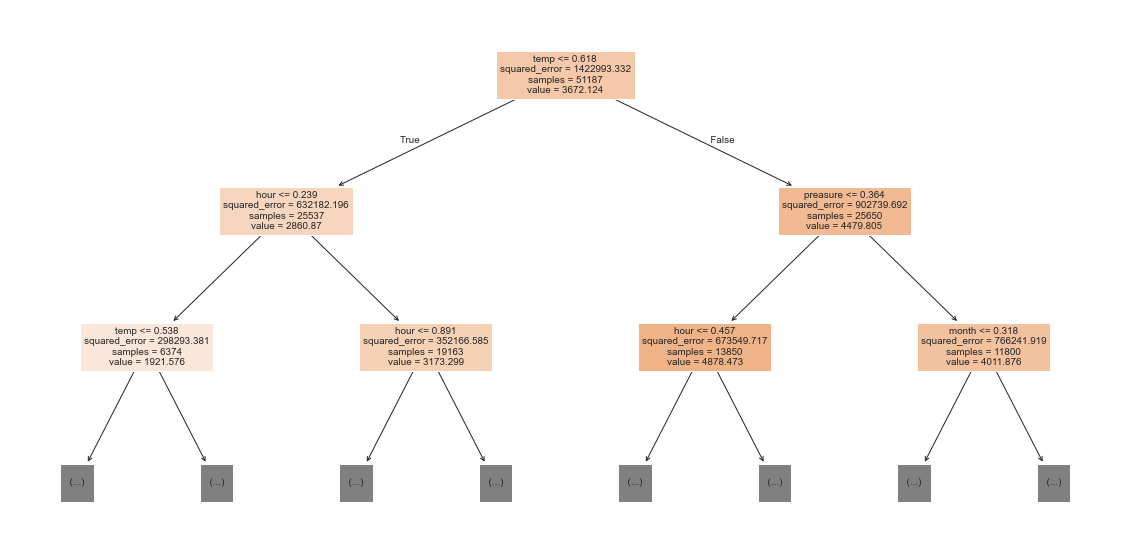

In [10]:
model = DecisionTreeRegressor(random_state=42)
model.fit(train_inputs, train_targets)



# Make predictions
y_pred = model.predict(test_inputs)

# Evaluate the model
mse = mean_squared_error(test_targets, y_pred)
r2 = r2_score(test_targets, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the tree (optional)
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=['month', 'hour', 'temp', 'wind_speed', 'preasure', 'electricity_consumed'], max_depth=2, filled=True)
plt.show()